<a href="https://colab.research.google.com/github/FaQ2108/Personal_Projects/blob/main/Analisis_de_Sentimientos_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Análisis de Sentimiento para Noticias Financieras

## Descripción General

Este proyecto tiene como objetivo analizar el sentimiento de noticias financieras relacionadas con un ticker de acción específico. El análisis de sentimiento es una técnica del procesamiento del lenguaje natural que permite identificar y clasificar la polaridad (positiva, negativa o neutral) de un texto. Esta herramienta es especialmente útil para:

- **Tomar Decisiones Informadas:** Comprender la percepción del mercado sobre una acción puede ser crucial para decisiones de inversión.
- **Monitoreo de Tendencias:** Permite detectar cambios y tendencias en el sentimiento del mercado en tiempo real.
- **Complemento al Análisis Tradicional:** Ofrece una dimensión adicional al análisis financiero convencional, proporcionando una visión más completa de la situación.

El script desarrollado en este proyecto se ejecuta en Google Colab y está modularizado para facilitar su comprensión y mantenimiento. En resumen, el script realiza las siguientes tareas:

1. **Autenticación y Conexión a NewsAPI:** Solicita al usuario su API key de NewsAPI de forma segura, estableciendo la conexión para obtener noticias relevantes.
2. **Selección del Ticker:** Permite al usuario ingresar el ticker de la acción que desea analizar.
3. **Obtención de Noticias:** Recupera las últimas 10 noticias en inglés relacionadas con el ticker ingresado.
4. **Traducción:** Traduce tanto el título como el resumen de cada noticia al español utilizando la librería `googletrans`.
5. **Análisis de Sentimiento:** Utiliza el analizador VADER para evaluar el sentimiento de cada noticia, asignando etiquetas y emojis (🟢 para positivo, 🔴 para negativo y ⚪ para neutral).
6. **Preprocesamiento de Texto:** Limpia y normaliza los textos para mejorar la calidad del análisis.
7. **Análisis Temporal:** Procesa las fechas de publicación para visualizar la distribución de las noticias a lo largo del tiempo.
8. **Visualización del Sentimiento Temporal:** Genera gráficos que muestran cómo varía el sentimiento a lo largo del tiempo, facilitando la identificación de tendencias y patrones.

Este enfoque modular y detallado no solo permite evaluar el sentimiento individual de cada noticia, sino también analizar la evolución del sentimiento a lo largo del tiempo, lo que resulta en una herramienta robusta para comprender la percepción del mercado financiero.

## Autenticación y Conexión a NewsAPI

En este bloque se solicita al usuario que ingrese su API key de NewsAPI de manera segura.

Se utiliza `getpass.getpass()` para que la clave se oculte mientras se ingresa.
Después, se muestra una versión en asteriscos de la clave para confirmar la entrada sin revelar la clave real.

**Instrucciones:**
1. Obtené tu API key en [NewsAPI](https://newsapi.org/).
2. Ingresá tu clave cuando se te solicite.
3. Verificá que la conexión se establezca correctamente.

In [25]:
import requests
import getpass

# Solicitar la API key al usuario de forma oculta
api_key = getpass.getpass("Ingresa tu API key de NewsAPI: ")

# Mostrar la API key enmascarada (por privacidad)
print("Tu API key es: " + "*" * len(api_key))

# Función para probar la conexión a NewsAPI
def test_connection():
    url = "https://newsapi.org/v2/top-headlines"
    params = {
        'q': 'finance',  # consulta genérica para probar la conexión
        'apiKey': api_key,
        'pageSize': 1  # solo se pide una noticia para la prueba
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        print("Conexión a NewsAPI exitosa.")
    else:
        print("Error en la conexión a NewsAPI. Revisa tu API key y la configuración.")

# Ejecutamos la función de prueba
test_connection()

Ingresa tu API key de NewsAPI: ··········
Tu API key es: ********************************
Conexión a NewsAPI exitosa.


## Selección del Ticker

En este bloque se le solicita al usuario que ingrese el ticker de la acción que desea analizar.
El ticker es el identificador único de la acción en el mercado financiero.
Se transforma a mayúsculas para mantener un formato estándar y se muestra una confirmación.

In [26]:
ticker = input("Ingresa el ticker de la acción que deseas analizar: ").upper().strip()
print(f"Analizando la acción: {ticker}")

Ingresa el ticker de la acción que deseas analizar: AAPL
Analizando la acción: AAPL


## Obtención de Noticias

En este bloque se realiza la consulta a NewsAPI utilizando el ticker ingresado.
Se utiliza el endpoint "everything" para obtener hasta 10 noticias relevantes en inglés,
ordenadas por fecha de publicación.
El resultado se guarda en una lista de diccionarios, donde cada uno contiene el título,
resumen y URL de la noticia.

In [27]:
def fetch_news(ticker, api_key):
    url = "https://newsapi.org/v2/everything"
    params = {
        "q": ticker,
        "pageSize": 30,          # Limitamos a las últimas X noticias
        "sortBy": "publishedAt", # Ordenadas por fecha de publicación
        "language": "en",        # Noticias en inglés (idioma original)
        "apiKey": api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        articles = data.get("articles", [])
        if articles:
            print(f"Se han obtenido {len(articles)} noticias para el ticker {ticker}.")
        else:
            print("No se encontraron noticias para el ticker ingresado.")
        return articles
    else:
        print("Error al obtener las noticias. Verifica tu conexión o la API key.")
        return []

# Ejemplo de uso:
articles = fetch_news(ticker, api_key)

Se han obtenido 30 noticias para el ticker AAPL.


## Traducción de Noticias

En este bloque se traducen el título y el resumen (description) de cada noticia del inglés al español,
utilizando la librería `googletrans`.
Se añaden dos nuevas claves en cada diccionario: "title_es" y "description_es" para almacenar las traducciones.

In [28]:
from googletrans import Translator

# Inicializamos el traductor
translator = Translator()

def translate_news_articles(articles):
    for article in articles:
        # Traducir el título
        if article.get("title"):
            translated_title = translator.translate(article["title"], dest="es").text
            article["title_es"] = translated_title
        else:
            article["title_es"] = "N/A"

        # Traducir el resumen/description
        if article.get("description"):
            translated_description = translator.translate(article["description"], dest="es").text
            article["description_es"] = translated_description
        else:
            article["description_es"] = "N/A"
    return articles

# Ejecutamos la traducción sobre las noticias obtenidas
articles = translate_news_articles(articles)

## Análisis de Sentimiento con VADER

En este bloque se analiza el sentimiento de cada noticia utilizando VADER.
Se evalúa una combinación del título y el resumen (description) para determinar si la noticia es
positiva, negativa o neutral, usando los siguientes umbrales:
- Compound score >= 0.05: Positivo (🟢)
- Compound score <= -0.05: Negativo (🔴)
- Valores intermedios: Neutral (⚪)
Se añaden nuevas claves al diccionario de cada noticia: "sentiment", "sentiment_score" y "sentiment_emoji".

In [29]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializamos el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(articles):
    for article in articles:
        # Concatenamos título y resumen para formar el texto de análisis
        text = ""
        if article.get("title"):
            text += article["title"]
        if article.get("description"):
            text += " " + article["description"]

        sentiment = sia.polarity_scores(text)
        compound = sentiment['compound']

        # Clasificamos el sentimiento
        if compound >= 0.05:
            sentiment_label = "Positivo"
            sentiment_emoji = "🟢"
        elif compound <= -0.05:
            sentiment_label = "Negativo"
            sentiment_emoji = "🔴"
        else:
            sentiment_label = "Neutral"
            sentiment_emoji = "⚪"

        article["sentiment"] = sentiment_label
        article["sentiment_score"] = compound
        article["sentiment_emoji"] = sentiment_emoji
    return articles

# Ejecutamos el análisis de sentimiento
articles = analyze_sentiment(articles)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## En este bloque se muestran los resultados individuales de cada noticia, incluyendo:
- Título y resumen en inglés (original) y en español (traducción).
- El sentimiento determinado, representado con emojis.

Además, se presenta un resumen global en formato markdown que incluye:
- Total de noticias analizadas.
- Cantidad y porcentaje de noticias positivas, negativas y neutrales.
- Promedio del compound score.

In [30]:
def display_results(articles):
    total = len(articles)
    count_pos = sum(1 for a in articles if a["sentiment"] == "Positivo")
    count_neg = sum(1 for a in articles if a["sentiment"] == "Negativo")
    count_neu = sum(1 for a in articles if a["sentiment"] == "Neutral")
    avg_compound = sum(a["sentiment_score"] for a in articles) / total if total > 0 else 0

    # Mostrar cada noticia
    for i, article in enumerate(articles, start=1):
        print(f"--- Noticia {i} ---")
        print(f"**Título (Original):** {article.get('title', 'N/A')}")
        print(f"**Título (Español):** {article.get('title_es', 'N/A')}")
        print(f"**Resumen (Original):** {article.get('description', 'N/A')}")
        print(f"**Resumen (Español):** {article.get('description_es', 'N/A')}")
        print(f"**Sentimiento:** {article.get('sentiment_emoji')} ({article.get('sentiment')}, Score: {article.get('sentiment_score')})\n")

    # Mostrar resumen global en formato markdown
    print("## Resumen Global")
    print(f"- Total de noticias analizadas: {total}")
    if total > 0:
        print(f"- Positivas: {count_pos} ({(count_pos/total*100):.2f}%)")
        print(f"- Negativas: {count_neg} ({(count_neg/total*100):.2f}%)")
        print(f"- Neutrales: {count_neu} ({(count_neu/total*100):.2f}%)")
        print(f"- Promedio del compound score: {avg_compound:.2f}")
    else:
        print("No se han obtenido noticias para analizar.")

# Ejecutamos la función para mostrar los resultados y el resumen global
display_results(articles)

--- Noticia 1 ---
**Título (Original):** Is Apple Inc. (AAPL) the Best Quality Stock to Invest in Now?
**Título (Español):** ¿Es Apple Inc. (AAPL) la mejor calidad para invertir ahora?
**Resumen (Original):** None
**Resumen (Español):** N/A
**Sentimiento:** 🟢 (Positivo, Score: 0.6369)

--- Noticia 2 ---
**Título (Original):** 5 quality ASX ETFs to buy after the selloff
**Título (Español):** 5 ETF ASX de calidad para comprar después de la venta de la venta
**Resumen (Original):** These funds could be top picks for Aussie investors following this month's market weakness.
The post 5 quality ASX ETFs to buy after the selloff appeared first on The Motley Fool Australia.
**Resumen (Español):** Estos fondos podrían ser las mejores opciones para los inversores australianos después de la debilidad del mercado de este mes.
El Post 5 de calidad ASX ETFS para comprar después de que la venta de la venta apareció primero en Motley Fool Australia.
**Sentimiento:** 🔴 (Negativo, Score: -0.5994)

--- No

## Preprocesamiento de Texto

En este bloque se implementa un preprocesamiento básico para limpiar y normalizar el texto de las noticias.
Se realizan las siguientes acciones:
- Conversión del texto a minúsculas.
- Eliminación de signos de puntuación y caracteres especiales.
- Reducción de espacios múltiples a un solo espacio.

Esto ayuda a mejorar la calidad del análisis de sentimiento y otros procesos posteriores.

In [35]:
import re

def preprocess_text(text):
    """
    Función para limpiar y normalizar el texto:
    - Convierte el texto a minúsculas.
    - Elimina signos de puntuación y caracteres especiales.
    - Elimina espacios extra.
    """
    if not text:
        return ""
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación y caracteres especiales (se conservan caracteres alfanuméricos y espacios)
    text = re.sub(r'[^a-záéíóúñü0-9\s]', '', text)
    # Eliminar espacios múltiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_articles(articles):
    """
    Aplica el preprocesamiento al título y resumen de cada noticia.
    Se agregan nuevas claves 'title_clean' y 'description_clean' a cada diccionario.
    """
    for article in articles:
        article["title_clean"] = preprocess_text(article.get("title"))
        article["description_clean"] = preprocess_text(article.get("description"))
    return articles

# Preprocesamos las noticias ya obtenidas
articles = preprocess_articles(articles)

# Ejemplo: Mostrar el título original y el título limpio de la primera noticia
if articles:
    print("Ejemplo de preprocesamiento:")
    print("Título original:", articles[0].get("title", "N/A"))
    print("Título limpio:", articles[0].get("title_clean", "N/A"))

Ejemplo de preprocesamiento:
Título original: Is Apple Inc. (AAPL) the Best Quality Stock to Invest in Now?
Título limpio: is apple inc aapl the best quality stock to invest in now


## Análisis Temporal de las Noticias

En este bloque se procesa la fecha de publicación de cada noticia usando el campo "publishedAt" proporcionado por NewsAPI.
Se extrae la fecha en formato "YYYY-MM-DD" y se almacena en un nuevo campo "published_date".
Luego, se cuenta la cantidad de noticias publicadas por cada día, lo que nos permite entender la distribución temporal de las noticias.

In [36]:
from datetime import datetime
from collections import Counter

def process_dates(articles):
    """
    Extrae y formatea la fecha de publicación (publishedAt) de cada noticia.
    Se agrega un nuevo campo 'published_date' con el formato 'YYYY-MM-DD'.
    """
    for article in articles:
        published_at = article.get("publishedAt", "")
        if published_at:
            try:
                # Convertir a objeto datetime (se reemplaza la 'Z' por '+00:00' para compatibilidad)
                dt = datetime.fromisoformat(published_at.replace("Z", "+00:00"))
                # Guardar solo la fecha en formato YYYY-MM-DD
                article["published_date"] = dt.date().isoformat()
            except Exception as e:
                article["published_date"] = "Fecha no válida"
        else:
            article["published_date"] = "N/A"
    return articles

def temporal_analysis(articles):
    """
    Realiza un análisis temporal contando la cantidad de noticias publicadas por cada fecha.
    Imprime un resumen en formato markdown mostrando la distribución de las noticias.
    """
    # Extraer las fechas de publicación válidas
    dates = [article.get("published_date", "N/A") for article in articles if article.get("published_date") not in ["N/A", "Fecha no válida"]]
    if dates:
        date_counts = Counter(dates)
        print("## Análisis Temporal de las Noticias")
        for date, count in sorted(date_counts.items()):
            print(f"- {date}: {count} noticia(s)")
    else:
        print("No se pudieron procesar las fechas de publicación de las noticias.")

# Procesamos las fechas de publicación en las noticias
articles = process_dates(articles)

# Realizamos y mostramos el análisis temporal
temporal_analysis(articles)

## Análisis Temporal de las Noticias
- 2025-03-15: 10 noticia(s)
- 2025-03-16: 20 noticia(s)


## Visualización Gráfica del Análisis Temporal
En este bloque se crea un gráfico de barras utilizando matplotlib para representar la cantidad de noticias publicadas por fecha.
Se extraen las fechas válidas del campo "published_date", se cuentan las ocurrencias y se generan las barras correspondientes.
Este gráfico permite visualizar de forma intuitiva la distribución temporal de las noticias.

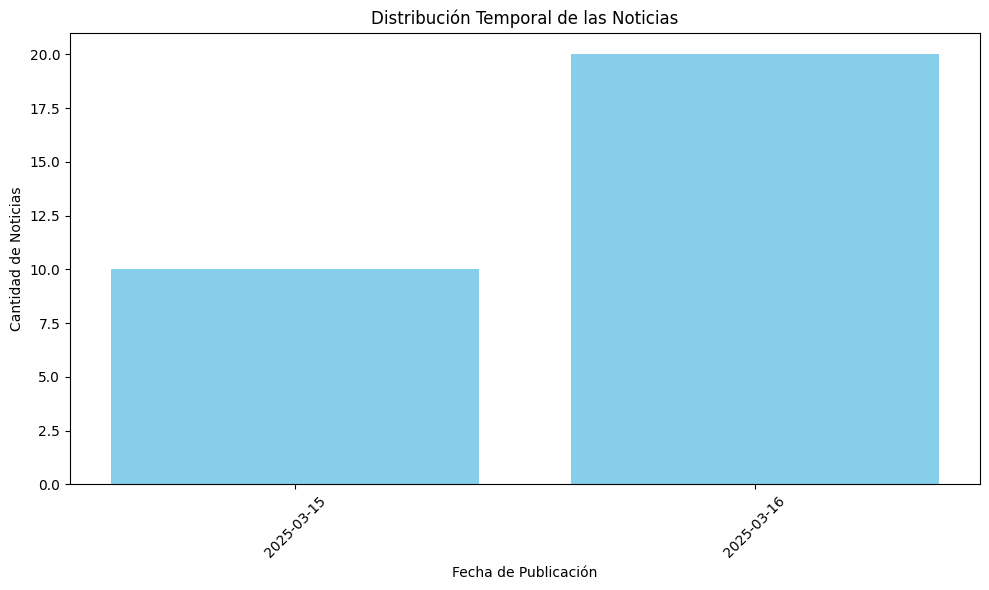

In [37]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_temporal_analysis(articles):
    # Extraer fechas válidas
    dates = [article.get("published_date") for article in articles if article.get("published_date") not in ["N/A", "Fecha no válida"]]
    if not dates:
        print("No se encontraron fechas válidas para graficar.")
        return

    # Contar la cantidad de noticias por cada fecha
    date_counts = Counter(dates)

    # Ordenar las fechas para una visualización coherente
    sorted_dates = sorted(date_counts.keys())
    counts = [date_counts[date] for date in sorted_dates]

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_dates, counts, color='skyblue')
    plt.xlabel("Fecha de Publicación")
    plt.ylabel("Cantidad de Noticias")
    plt.title("Distribución Temporal de las Noticias")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ejecutar la función para mostrar el gráfico
plot_temporal_analysis(articles)

## Análisis de Sentimiento Temporal

En este bloque se realiza el análisis del sentimiento a lo largo del tiempo.
Se agrupan las noticias por su fecha de publicación (campo "published_date") y se calcula:
- La cantidad de noticias positivas, neutrales y negativas por fecha.
- El promedio del compound score para cada fecha.

Se generan dos gráficos:
1. Un gráfico de barras apiladas que muestra la distribución de sentimientos.
2. Un gráfico de línea que muestra el promedio del compound score a lo largo del tiempo.

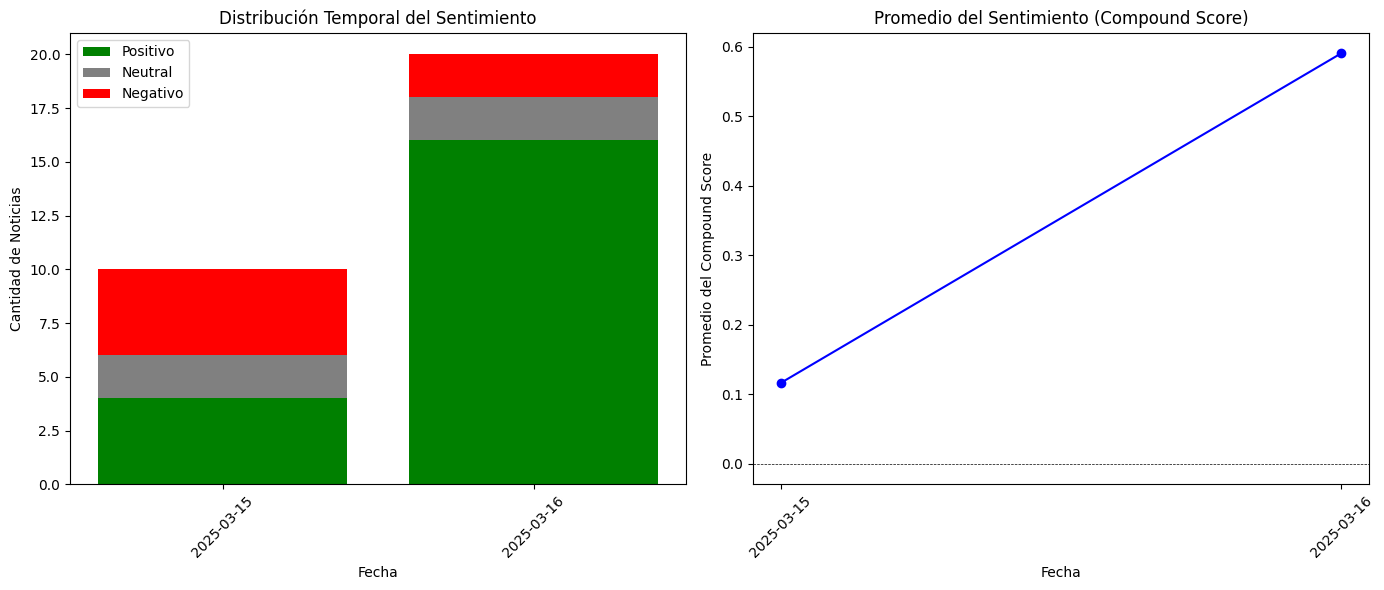

In [38]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Inicializamos diccionarios para contar sentimientos y acumular scores
sentiment_counts = defaultdict(lambda: {"Positivo": 0, "Negativo": 0, "Neutral": 0})
compound_sum = defaultdict(float)
article_count = defaultdict(int)

# Procesamos cada noticia
for article in articles:
    date = article.get("published_date")
    if date and date not in ["N/A", "Fecha no válida"]:
        sentiment = article.get("sentiment")
        sentiment_counts[date][sentiment] += 1
        compound_sum[date] += article.get("sentiment_score", 0)
        article_count[date] += 1

# Ordenamos las fechas para la visualización
sorted_dates = sorted(sentiment_counts.keys())

# Extraemos los datos para cada fecha
positive_counts = [sentiment_counts[date]["Positivo"] for date in sorted_dates]
neutral_counts  = [sentiment_counts[date]["Neutral"] for date in sorted_dates]
negative_counts = [sentiment_counts[date]["Negativo"] for date in sorted_dates]
average_compound = [compound_sum[date] / article_count[date] for date in sorted_dates]

# Creamos dos subplots: uno para el gráfico de barras apiladas y otro para el promedio del compound score
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Barras apiladas de la distribución de sentimientos
axs[0].bar(sorted_dates, positive_counts, color="green", label="Positivo")
axs[0].bar(sorted_dates, neutral_counts, bottom=positive_counts, color="gray", label="Neutral")
bottom_neg = [p + n for p, n in zip(positive_counts, neutral_counts)]
axs[0].bar(sorted_dates, negative_counts, bottom=bottom_neg, color="red", label="Negativo")
axs[0].set_xlabel("Fecha")
axs[0].set_ylabel("Cantidad de Noticias")
axs[0].set_title("Distribución Temporal del Sentimiento")
axs[0].legend()

# Gráfico 2: Línea del promedio del compound score por fecha
axs[1].plot(sorted_dates, average_compound, marker='o', color="blue")
axs[1].set_xlabel("Fecha")
axs[1].set_ylabel("Promedio del Compound Score")
axs[1].set_title("Promedio del Sentimiento (Compound Score)")
axs[1].axhline(0, color="black", linestyle="--", linewidth=0.5)

# Rotar etiquetas en el eje x para una mejor legibilidad
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()